In [15]:
import numpy as np 
import pandas as pd

In [16]:
data = pd.read_csv('/content/drive/MyDrive/Dataset_depression/Dataset.csv')

In [17]:
print(data)

                       Timestamp  ... How long did you sleep last night?(in hours)
0    2020/12/03 3:26:01 PM GMT+6  ...                                            7
1    2020/12/03 6:25:04 PM GMT+6  ...                                            7
2    2020/12/04 5:40:40 PM GMT+6  ...                                            7
3    2020/12/04 8:43:29 PM GMT+6  ...                                            7
4    2020/12/05 4:14:34 PM GMT+6  ...                                            7
..                           ...  ...                                          ...
699  2021/01/30 4:47:47 PM GMT+6  ...                                            8
700  2021/01/30 4:47:54 PM GMT+6  ...                                            9
701  2021/01/30 4:48:01 PM GMT+6  ...                                            8
702  2021/01/30 4:48:09 PM GMT+6  ...                                           10
703  2021/01/30 4:48:15 PM GMT+6  ...                                            8

[70

In [18]:
data.drop(['Timestamp'], axis = 1, inplace = True)
data.head()

,Which year are you in?,How are you feeling right now?,"On a scale of 1-100, how would you express this feeling?",Gender,Age,Your location ?,Relationship status,Are you happy with your financial state?,How much have you succeeded to cope up with the environment of your educational institution?,Understanding with your family members?,Are you feeling pressure in your study or work right now?,Are you satisfied with your academic result?,Are you happy with your living place?,Who supports you when you are not succeeding in your academic life?,Have you used any social media within the last 6 hours?,Do you have inferiority complex?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?",How long did you sleep last night?(in hours)
0,4th year,Normal,50,Male,23,Home,Single,Yes,4,Normal,No,Yes,No,Family,Yes,No,Yes,No,No,7
1,4th year,Normal,40,Male,23,Home,Single,Yes,4,Normal,Yes,Yes,No,Family,Yes,No,Yes,No,No,7
2,4th year,Bad,50,Male,23,Home,Single,Yes,4,Normal,Yes,Yes,No,Family,Yes,No,Yes,No,No,7
3,4th year,Normal,45,Male,23,Home,Single,Yes,4,Normal,No,Yes,No,Family,Yes,No,Yes,No,No,7
4,4th year,Normal,50,Male,23,Home,Single,Yes,4,Normal,Yes,Yes,Yes,Family,Yes,No,Yes,No,No,7


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 20 columns):
 #   Column                                                                                        Non-Null Count  Dtype 
---  ------                                                                                        --------------  ----- 
 0   Which year are you in?                                                                        704 non-null    object
 1   How are you feeling right now?                                                                704 non-null    object
 2   On a scale of 1-100, how would you express this feeling?                                      704 non-null    int64 
 3   Gender                                                                                        704 non-null    object
 4   Age                                                                                           704 non-null    int64 
 5   Your location ?                     

In [20]:
new_data = data.dropna(axis = 0)

In [21]:
new_data.shape

(703, 20)

In [22]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703 entries, 0 to 703
Data columns (total 20 columns):
 #   Column                                                                                        Non-Null Count  Dtype 
---  ------                                                                                        --------------  ----- 
 0   Which year are you in?                                                                        703 non-null    object
 1   How are you feeling right now?                                                                703 non-null    object
 2   On a scale of 1-100, how would you express this feeling?                                      703 non-null    int64 
 3   Gender                                                                                        703 non-null    object
 4   Age                                                                                           703 non-null    int64 
 5   Your location ?                     

In [23]:
new_data.describe()

,"On a scale of 1-100, how would you express this feeling?",Age,How much have you succeeded to cope up with the environment of your educational institution?,How long did you sleep last night?(in hours)
count,703.000000,703.0,703.000000,703.000000
mean,56.204836,23.0,3.257468,6.807966
std,30.223491,0.0,1.254279,1.957917
min,1.000000,23.0,1.000000,3.000000
25%,30.000000,23.0,2.000000,6.000000
50%,59.000000,23.0,3.000000,7.000000
75%,85.000000,23.0,4.000000,8.000000
max,100.000000,23.0,5.000000,10.000000


In [24]:
question = new_data.columns
question

Index(['Which year are you in?', 'How are you feeling right now?',
       'On a scale of 1-100, how would you express this feeling?', 'Gender',
       'Age', 'Your location ?', 'Relationship status',
       'Are you happy with your financial state?',
       'How much have you succeeded to cope up with the environment of your educational institution?',
       'Understanding with your family members?',
       'Are you feeling pressure in your study or work right now?',
       'Are you satisfied with your academic result?',
       'Are you happy with your living place?',
       'Who supports you when you are not succeeding in your academic life?',
       'Have you used any social media within the last 6 hours?',
       'Do you have inferiority complex? ',
       'Are you satisfied with your meal today?',
       'Are you feeling sick/health issues today?',
       'Have you done any recreational activity (sports, gaming, hobby etc.) today?',
       'How long did you sleep last night?(in hou

In [25]:
data1 = new_data.copy()

**Encoding data**

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data1 = new_data.apply(LabelEncoder().fit_transform)
data1


,Which year are you in?,How are you feeling right now?,"On a scale of 1-100, how would you express this feeling?",Gender,Age,Your location ?,Relationship status,Are you happy with your financial state?,How much have you succeeded to cope up with the environment of your educational institution?,Understanding with your family members?,Are you feeling pressure in your study or work right now?,Are you satisfied with your academic result?,Are you happy with your living place?,Who supports you when you are not succeeding in your academic life?,Have you used any social media within the last 6 hours?,Do you have inferiority complex?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?",How long did you sleep last night?(in hours)
0,0,2,49,0,0,2,0,1,3,2,0,1,0,0,0,1,2,0,0,4
1,0,2,39,0,0,2,0,1,3,2,1,1,0,0,0,1,2,0,0,4
2,0,0,49,0,0,2,0,1,3,2,1,1,0,0,0,1,2,0,0,4
3,0,2,44,0,0,2,0,1,3,2,0,1,0,0,0,1,2,0,0,4
4,0,2,49,0,0,2,0,1,3,2,1,1,1,0,0,1,2,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,2,61,0,0,3,0,1,4,2,0,0,0,1,0,0,2,0,0,5
700,0,4,89,0,0,3,0,1,4,2,0,0,1,0,0,1,0,0,1,6
701,0,4,91,0,0,1,0,1,4,2,0,1,1,0,0,1,2,0,0,5
702,0,4,98,0,0,3,0,1,3,1,0,1,1,1,0,1,2,0,1,7


In [27]:
correlation_matrix = data1.corr()
correlation_matrix['On a scale of 1-100, how would you express this feeling?'].sort_values(ascending = False)

On a scale of 1-100, how would you express this feeling?                                        1.000000
How long did you sleep last night?(in hours)                                                    0.749421
How much have you succeeded to cope up with the environment of your educational institution?    0.652036
Are you happy with your financial state?                                                        0.462862
Are you happy with your living place?                                                           0.435309
Understanding with your family members?                                                         0.251391
How are you feeling right now?                                                                  0.234482
Your location ?                                                                                 0.045195
Are you satisfied with your academic result?                                                    0.040919
Have you done any recreational activity (sports, gaming

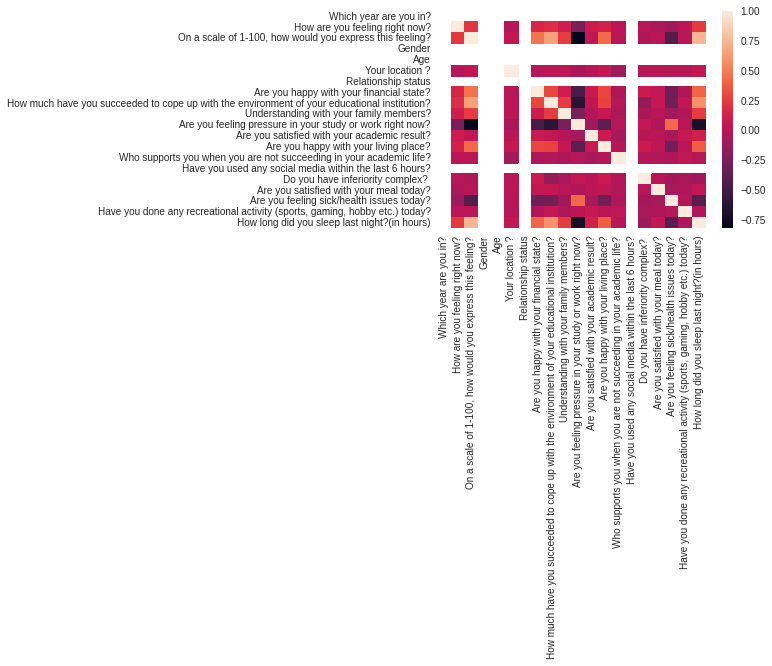

In [28]:
import seaborn as sns
sns.heatmap(data1.corr())

**Selecting depended and independent variable**

In [29]:
y = data1['On a scale of 1-100, how would you express this feeling?']
X = data1.drop(['On a scale of 1-100, how would you express this feeling?',
                'Gender', 'Age', 'Relationship status', 'Your location ?',
                'Have you done any recreational activity (sports, gaming, hobby etc.) today?',
                'Are you satisfied with your meal today?', 'Who supports you when you are not succeeding in your academic life?',
                'Are you feeling sick/health issues today?','Are you feeling pressure in your study or work right now?',
                'Which year are you in?','Have you used any social media within the last 6 hours?'], axis=1)

**Spliting data for train & validation**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state= 1)

In [32]:
print(X_train.shape, X_valid.shape)

(492, 8) (211, 8)


**Linear Regression Model**

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
coeff = pd.DataFrame(regressor.coef_, X.columns, columns = ['coefficient'])
coeff 

,coefficient
How are you feeling right now?,0.684634
Are you happy with your financial state?,8.804912
How much have you succeeded to cope up with the environment of your educational institution?,7.215113
Understanding with your family members?,2.208328
Are you satisfied with your academic result?,-2.096774
Are you happy with your living place?,8.024138
Do you have inferiority complex?,1.826543
How long did you sleep last night?(in hours),7.221519


In [36]:
alpha = regressor.intercept_
alpha

-4.859387117926708

In [37]:
beta = regressor.coef_
beta

array([ 0.68463398,  8.80491163,  7.21511293,  2.20832784, -2.09677363,
        8.02413751,  1.82654331,  7.22151913])

In [38]:
y_pred = regressor.predict(X_valid)

In [39]:
y_pred

array([ 31.7677842 ,   0.84760143,  58.96870822,  34.10472886,
        47.04965965,  81.62074904,  19.45773836,  91.05059602,
        49.78201206,  91.09346771,  55.9513558 ,  88.87873367,
        57.2673553 ,  64.99941824,  46.24063507,  60.11702376,
        39.30215866,  35.55950454,  65.13021505,  33.87096403,
        72.35173418,  74.44850781,  35.46076273,  83.82907688,
        83.71111646,  57.00353119,  33.5189921 ,  46.51727159,
        47.15925658,  81.62715525,  66.52951831,  85.9194443 ,
        88.99669409,  98.30858064,  15.51101503,  67.18411698,
        79.56044091,  81.62715525,  78.41853158,  73.86261564,
        88.84226818,  39.77648366,  65.81484903,  67.18411698,
        45.44444688,  33.28929807,  54.86788764,  88.83586197,
        79.56044091,  61.25893309,  28.06156057,  15.62274864,
        39.06839383,  88.83586197,  83.87835478,  26.22220485,
        71.19701244,  81.78158116,  81.76876875,  88.99669409,
        73.53693688,  36.8171943 ,  83.82907688,  62.89

In [40]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

Mean Absolute Error: 12.977054971338681
Mean Squared Error: 275.23705038179975
Root Mean Squared Error: 16.5902697501216


In [41]:
from sklearn.metrics import r2_score

In [42]:
r2_score(y_valid, y_pred)

0.6869256249145866

# Visualizing linear regression 

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


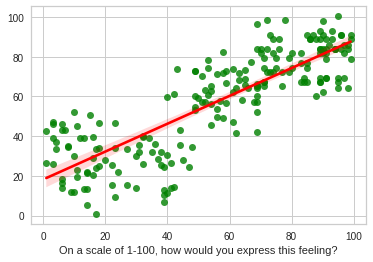

In [44]:
sns.regplot(y_valid, y_pred, 
            scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.show()

# Ploting Residual Error

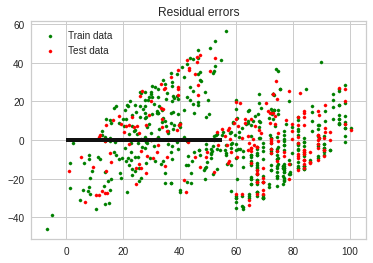

In [53]:
# plotting residual errors in training data

plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
# plotting residual errors in test data

plt.scatter(y_pred, y_pred - y_valid,
            color = "red", s = 10, label = 'Test data')
 
# plotting line for zero residual error

plt.hlines(y = 0, xmin = 0, xmax = 55, linewidth = 4)
plt.title("Residual errors")
plt.legend(loc = 'upper left')
plt.show()